In [1]:
#Load data
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('TV_Final.csv')
df = pd.DataFrame(data)
df

Brand     Resolution  Size   Selling Price  Original Price  \
0    TOSHIBA   Ultra HD LED     55          37999           54990   
1       TCL   QLED Ultra HD     55          52999          129990   
2    realme          HD LED     32          13999           17999   
3        Mi          HD LED     32          14999           19999   
4    realme          HD LED     32          12999           21999   
..       ...            ...    ...            ...             ...   
907    SONY     Full HD LED     43          44999           57900   
908    SONY     Full HD LED     40          41499           51900   
909    SONY    Ultra HD LED     65         149990          184990   
910    SONY          HD LED     32          32900           32900   
911    SONY     Full HD LED     43          56900           56900   

    Operating System  Rating  
0              VIDAA     4.3  
1            Android     4.4  
2            Android     4.3  
3            Android     4.4  
4            Android     4.3  
..               ...     ...  
907            Linux     4.4  
908            Linux     4.6  
909            Linux     4.3  
910            Linux     4.4  
911            Linux     4.6  

[912 rows x 7 columns]

In [3]:
df.nunique()

Brand                59
Resolution            5
Size                 27
Selling Price       515
Original Price      455
Operating System      7
Rating               25
dtype: int64

In [4]:
print("Different Values of Resolution")
print(df['Resolution'].unique())
print("Different Value of operating System")
print(df['Operating System'].unique())
print("Different Brands of Television")
print(df['Brand'].unique())

Different Values of Resolution
['Ultra HD LED' 'QLED Ultra HD' 'HD LED' 'Full HD LED' 'HD Plasma']
Different Value of operating System
['VIDAA' 'Android' 'Linux' nan 'Tizen' 'WebOS' 'HomeOS' 'FireTV OS']
Different Brands of Television
['TOSHIBA' 'TCL ' 'realme ' 'Mi ' 'OnePlus' 'Hisense' 'LG '
 'MarQ by Flipkart' 'iFFALCON by TCL' 'Coocaa ' 'SAMSUNG' 'Infinix' 'Vu'
 'Nokia ' 'Thomson' 'SONY ' 'KODAK ' 'MOTOROLA' 'PHILIPS' 'Acer'
 'Blaupunkt' 'Adsun' 'T-Series' 'Panasonic' 'Micromax' 'Sansui ' 'Croma '
 'Candes ' 'Dyanora' 'Haier ' 'Onida' 'RGL ' 'Lloyd ' 'LumX ' 'Onix '
 'IMPEX ' 'BPL ' 'CloudWalker' 'Oxygen ' 'Power Guard' 'Akai ' 'VG '
 'Sun King' 'Compaq ' 'HUIDI ' 'Intex ' 'DETEL ' 'JVC' 'G-TEN ' 'Skyworth'
 'Maser ' 'Sanyo ' 'MURPHY ' 'Samsung' 'Dektron' 'Sharp ' 'KRISONS'
 'Weston ' 'AISEN  ']


In [5]:
# count of products by Resolution
df['Brand'].groupby(df['Resolution']).count().sort_values(ascending=False)

Resolution
Ultra HD LED     399
HD LED           229
Full HD LED      220
QLED Ultra HD     60
HD Plasma          4
Name: Brand, dtype: int64

In [6]:
round(df.groupby('Brand')['Rating'].mean().sort_values(ascending=False),1)

Brand
SONY                4.5
OnePlus             4.4
Hisense             4.4
Haier               4.4
Vu                  4.4
TOSHIBA             4.4
MOTOROLA            4.3
Mi                  4.3
Compaq              4.3
Onida               4.3
Thomson             4.3
Onix                4.3
KODAK               4.3
Dektron             4.3
iFFALCON by TCL     4.3
LG                  4.3
realme              4.3
SAMSUNG             4.3
MarQ by Flipkart    4.3
Nokia               4.3
Coocaa              4.2
Blaupunkt           4.2
Weston              4.2
TCL                 4.2
Sanyo               4.2
Infinix             4.2
Intex               4.2
Panasonic           4.2
IMPEX               4.1
Croma               4.1
Sansui              4.1
Micromax            4.1
PHILIPS             4.1
HUIDI               4.1
CloudWalker         4.1
Samsung             4.1
Lloyd               4.1
Candes              4.1
JVC                 4.0
DETEL               4.0
LumX                4.0
Acer      

In [7]:
df.replace("?",np.nan,inplace=True)

In [8]:
df.isnull().sum()

Brand                 0
Resolution            0
Size                  0
Selling Price         0
Original Price        0
Operating System     11
Rating              220
dtype: int64

In [9]:
num = df.select_dtypes(include=['int','float'])
num.head()

Size   Selling Price  Original Price  Rating
0     55          37999           54990     4.3
1     55          52999          129990     4.4
2     32          13999           17999     4.3
3     32          14999           19999     4.4
4     32          12999           21999     4.3

In [10]:
from sklearn.impute import SimpleImputer
simple = SimpleImputer(strategy='mean')
numeric = simple.fit_transform(num)
numeric

array([[5.5000e+01, 3.7999e+04, 5.4990e+04, 4.3000e+00],
       [5.5000e+01, 5.2999e+04, 1.2999e+05, 4.4000e+00],
       [3.2000e+01, 1.3999e+04, 1.7999e+04, 4.3000e+00],
       ...,
       [6.5000e+01, 1.4999e+05, 1.8499e+05, 4.3000e+00],
       [3.2000e+01, 3.2900e+04, 3.2900e+04, 4.4000e+00],
       [4.3000e+01, 5.6900e+04, 5.6900e+04, 4.6000e+00]])

In [11]:
numeric_df = pd.DataFrame(numeric, columns=num.columns)
numeric_df

Size   Selling Price  Original Price  Rating
0     55.0        37999.0         54990.0     4.3
1     55.0        52999.0        129990.0     4.4
2     32.0        13999.0         17999.0     4.3
3     32.0        14999.0         19999.0     4.4
4     32.0        12999.0         21999.0     4.3
..     ...            ...             ...     ...
907   43.0        44999.0         57900.0     4.4
908   40.0        41499.0         51900.0     4.6
909   65.0       149990.0        184990.0     4.3
910   32.0        32900.0         32900.0     4.4
911   43.0        56900.0         56900.0     4.6

[912 rows x 4 columns]

In [12]:
numeric_df.isnull().sum()

Size              0
Selling Price     0
Original Price    0
Rating            0
dtype: int64

C:\Users\plha9\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


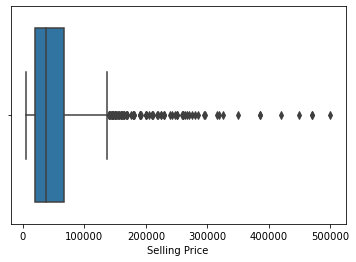

In [13]:
sns.boxplot(numeric_df['Selling Price'])
plt.show()

In [14]:
Q1=numeric_df['Selling Price'].quantile(0.25)
Q3=numeric_df['Selling Price'].quantile(0.75)
IQR=Q3-Q1
Upperlimit=Q3+(IQR*1.5)
Lowerlimit=Q1-(IQR*1.5)
newdf=numeric_df[(numeric_df['Selling Price'] > Lowerlimit)&(numeric_df['Selling Price'] <Upperlimit)]
newdf.shape

(814, 4)

In [15]:
deleteddf=numeric_df[(numeric_df['Selling Price'] < Lowerlimit) | (numeric_df['Selling Price'] > Upperlimit)]
deleteddf.shape

(98, 4)

C:\Users\plha9\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


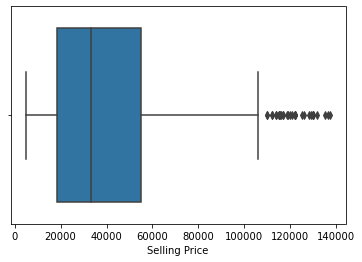

In [16]:
sns.boxplot(newdf['Selling Price'])
plt.show()

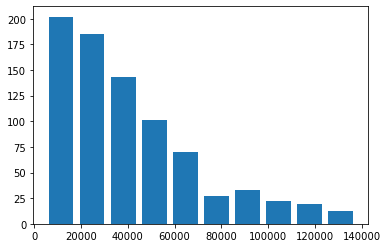

In [17]:
plt.hist(newdf['Selling Price'],bins=10,rwidth=0.8)
plt.show()

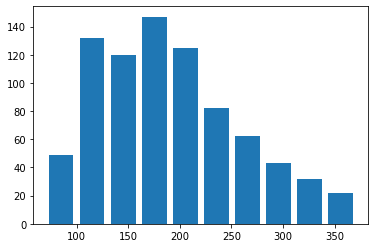

In [18]:
x=np.sqrt(newdf['Selling Price'])
plt.hist(x,bins=10,rwidth=0.8)
plt.show()

In [19]:
newdf

Size   Selling Price  Original Price  Rating
0     55.0        37999.0         54990.0     4.3
1     55.0        52999.0        129990.0     4.4
2     32.0        13999.0         17999.0     4.3
3     32.0        14999.0         19999.0     4.4
4     32.0        12999.0         21999.0     4.3
..     ...            ...             ...     ...
906   49.0        54999.0        114900.0     4.6
907   43.0        44999.0         57900.0     4.4
908   40.0        41499.0         51900.0     4.6
910   32.0        32900.0         32900.0     4.4
911   43.0        56900.0         56900.0     4.6

[814 rows x 4 columns]

In [20]:
from sklearn.impute import SimpleImputer
simple3 = SimpleImputer(strategy='mean')
numeric2 = simple3.fit_transform(newdf)
numeric2

array([[5.5000e+01, 3.7999e+04, 5.4990e+04, 4.3000e+00],
       [5.5000e+01, 5.2999e+04, 1.2999e+05, 4.4000e+00],
       [3.2000e+01, 1.3999e+04, 1.7999e+04, 4.3000e+00],
       ...,
       [4.0000e+01, 4.1499e+04, 5.1900e+04, 4.6000e+00],
       [3.2000e+01, 3.2900e+04, 3.2900e+04, 4.4000e+00],
       [4.3000e+01, 5.6900e+04, 5.6900e+04, 4.6000e+00]])

In [21]:
newdf2 = pd.DataFrame(numeric2, columns=newdf.columns)
newdf2

Size   Selling Price  Original Price  Rating
0     55.0        37999.0         54990.0     4.3
1     55.0        52999.0        129990.0     4.4
2     32.0        13999.0         17999.0     4.3
3     32.0        14999.0         19999.0     4.4
4     32.0        12999.0         21999.0     4.3
..     ...            ...             ...     ...
809   49.0        54999.0        114900.0     4.6
810   43.0        44999.0         57900.0     4.4
811   40.0        41499.0         51900.0     4.6
812   32.0        32900.0         32900.0     4.4
813   43.0        56900.0         56900.0     4.6

[814 rows x 4 columns]

In [22]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
numeric_df = scaler.fit_transform(newdf2)
numeric_df = pd.DataFrame(numeric_df, columns = newdf.columns)
numeric_df

Size   Selling Price  Original Price    Rating
0    0.978320      -0.094273       -0.088839  0.234859
1    0.978320       0.426433        1.601726  0.557964
2   -1.064065      -0.927402       -0.922648  0.234859
3   -1.064065      -0.892688       -0.877567  0.557964
4   -1.064065      -0.962116       -0.832485  0.234859
..        ...            ...             ...       ...
809  0.445524       0.495860        1.261584  1.204174
810 -0.087272       0.148723       -0.023245  0.557964
811 -0.353670       0.027225       -0.158490  1.204174
812 -1.064065      -0.271278       -0.586767  0.557964
813 -0.087272       0.561851       -0.045786  1.204174

[814 rows x 4 columns]

In [23]:
deleteddf.index

Int64Index([173, 183, 187, 195, 200, 202, 206, 208, 209, 211, 212, 217, 222,
            227, 228, 230, 231, 235, 240, 243, 244, 245, 253, 258, 259, 260,
            261, 265, 268, 270, 276, 279, 280, 283, 293, 297, 298, 299, 301,
            303, 304, 327, 330, 331, 339, 340, 342, 343, 348, 349, 350, 351,
            358, 359, 363, 364, 368, 378, 383, 389, 416, 420, 476, 478, 485,
            507, 528, 581, 593, 597, 661, 666, 673, 675, 676, 677, 678, 679,
            680, 681, 684, 685, 688, 695, 701, 704, 708, 712, 714, 718, 719,
            720, 723, 883, 884, 885, 886, 909],
           dtype='int64')

In [24]:
df.drop(deleteddf.index,axis=0,inplace=True)

In [25]:
cat = df.select_dtypes(include=['object'])
cat.head()

Brand     Resolution Operating System
0  TOSHIBA   Ultra HD LED            VIDAA
1     TCL   QLED Ultra HD          Android
2  realme          HD LED          Android
3      Mi          HD LED          Android
4  realme          HD LED          Android

In [26]:
cat.isnull().sum()

Brand                0
Resolution           0
Operating System    11
dtype: int64

In [27]:
from sklearn.impute import SimpleImputer
simple2=SimpleImputer(strategy='most_frequent')
category=simple2.fit_transform(cat)
category

array([['TOSHIBA', 'Ultra HD LED', 'VIDAA'],
       ['TCL ', 'QLED Ultra HD', 'Android'],
       ['realme ', 'HD LED', 'Android'],
       ...,
       ['SONY ', 'Full HD LED', 'Linux'],
       ['SONY ', 'HD LED', 'Linux'],
       ['SONY ', 'Full HD LED', 'Linux']], dtype=object)

In [28]:
cat_df = pd.DataFrame(category, columns=cat.columns)
cat_df

Brand     Resolution Operating System
0    TOSHIBA   Ultra HD LED            VIDAA
1       TCL   QLED Ultra HD          Android
2    realme          HD LED          Android
3        Mi          HD LED          Android
4    realme          HD LED          Android
..       ...            ...              ...
809    SONY    Ultra HD LED            Linux
810    SONY     Full HD LED            Linux
811    SONY     Full HD LED            Linux
812    SONY          HD LED            Linux
813    SONY     Full HD LED            Linux

[814 rows x 3 columns]

In [29]:
alldf=pd.concat([newdf2,cat_df],axis=1)
alldf

Size   Selling Price  Original Price  Rating    Brand     Resolution  \
0     55.0        37999.0         54990.0     4.3  TOSHIBA   Ultra HD LED   
1     55.0        52999.0        129990.0     4.4     TCL   QLED Ultra HD   
2     32.0        13999.0         17999.0     4.3  realme          HD LED   
3     32.0        14999.0         19999.0     4.4      Mi          HD LED   
4     32.0        12999.0         21999.0     4.3  realme          HD LED   
..     ...            ...             ...     ...      ...            ...   
809   49.0        54999.0        114900.0     4.6    SONY    Ultra HD LED   
810   43.0        44999.0         57900.0     4.4    SONY     Full HD LED   
811   40.0        41499.0         51900.0     4.6    SONY     Full HD LED   
812   32.0        32900.0         32900.0     4.4    SONY          HD LED   
813   43.0        56900.0         56900.0     4.6    SONY     Full HD LED   

    Operating System  
0              VIDAA  
1            Android  
2            Android  
3            Android  
4            Android  
..               ...  
809            Linux  
810            Linux  
811            Linux  
812            Linux  
813            Linux  

[814 rows x 7 columns]

In [30]:
from sklearn.model_selection import train_test_split
X = alldf.drop(columns=['Selling Price','Original Price'])
y =  alldf['Selling Price']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state=5)
X.columns

Index(['Size ', 'Rating', 'Brand', 'Resolution', 'Operating System'], dtype='object')

In [31]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder


In [32]:
numeric_cols = X.select_dtypes(include=['int64','float64']).columns
print(numeric_cols)

Index(['Size ', 'Rating'], dtype='object')


In [33]:
categorical_cols= X.select_dtypes(include=['object',]).columns
print(categorical_cols)

Index(['Brand', 'Resolution', 'Operating System'], dtype='object')


In [34]:
n_transformer = Pipeline(steps=
                       [
                         ('imputeN',SimpleImputer(strategy='mean')),
                           ('scale',StandardScaler())
                       ])

In [35]:
c_transformer = Pipeline(steps=
                       [
                           ('imputeC',SimpleImputer(strategy='constant', fill_value='missing')),
                           ('onehot',OneHotEncoder(handle_unknown='ignore'))
                       ])

In [36]:
from sklearn.compose import ColumnTransformer
preprocessing = ColumnTransformer(transformers=
                       [
                           ('numeric',n_transformer,numeric_cols),
                           ('categoric',c_transformer,categorical_cols)
                       ])
preprocessing

ColumnTransformer(transformers=[('numeric',
                                 Pipeline(steps=[('imputeN', SimpleImputer()),
                                                 ('scale', StandardScaler())]),
                                 Index(['Size ', 'Rating'], dtype='object')),
                                ('categoric',
                                 Pipeline(steps=[('imputeC',
                                                  SimpleImputer(fill_value='missing',
                                                                strategy='constant')),
                                                 ('onehot',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 Index(['Brand', 'Resolution', 'Operating System'], dtype='object'))])

Linear Regression

In [37]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [38]:
Mymodel = Pipeline(steps=
                  [
                      ('pre',preprocessing),
                      ('est',lr)
                  ])


In [39]:
from sklearn import set_config
set_config(display='diagram')
Mymodel.fit(X_train, y_train)

Pipeline(steps=[('pre',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('imputeN',
                                                                   SimpleImputer()),
                                                                  ('scale',
                                                                   StandardScaler())]),
                                                  Index(['Size ', 'Rating'], dtype='object')),
                                                 ('categoric',
                                                  Pipeline(steps=[('imputeC',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['Brand', 'Resolution', 'Operating System'], dtype='object'))])),
                ('est', LinearRegression())])

In [40]:
Mymodel.score(X_train, y_train)

0.7471036549101715

In [41]:
Mymodel.score(X_test, y_test)

0.7216247647720124

K-Nearest Neighbors

In [42]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors=3,weights='distance',algorithm='kd_tree')

In [43]:
Mymodel1 = Pipeline(steps=
                  [
                      ('pre',preprocessing),
                      ('est',knn)
                  ])
Mymodel1

Pipeline(steps=[('pre',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('imputeN',
                                                                   SimpleImputer()),
                                                                  ('scale',
                                                                   StandardScaler())]),
                                                  Index(['Size ', 'Rating'], dtype='object')),
                                                 ('categoric',
                                                  Pipeline(steps=[('imputeC',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['Brand', 'Resolution', 'Operating System'], dtype='object'))])),
                ('est',
                 KNeighborsRegressor(algorithm='kd_tree', n_neighbors=3,
                                     weights='distance'))])

In [44]:
from sklearn import set_config
set_config(display='diagram')
Mymodel1.fit(X_train,y_train)

C:\Users\plha9\anaconda3\lib\site-packages\sklearn\neighbors\_base.py:504: UserWarning: cannot use tree with sparse input: using brute force
  warnings.warn("cannot use tree with sparse input: using brute force")


Pipeline(steps=[('pre',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('imputeN',
                                                                   SimpleImputer()),
                                                                  ('scale',
                                                                   StandardScaler())]),
                                                  Index(['Size ', 'Rating'], dtype='object')),
                                                 ('categoric',
                                                  Pipeline(steps=[('imputeC',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['Brand', 'Resolution', 'Operating System'], dtype='object'))])),
                ('est',
                 KNeighborsRegressor(algorithm='kd_tree', n_neighbors=3,
                                     weights='distance'))])

In [45]:
Mymodel1.score(X_train, y_train)

0.9633391744548516

In [46]:
Mymodel1.score(X_test, y_test)

0.7872471039185703

Decision Tree Regressor

In [47]:
from sklearn.tree import DecisionTreeRegressor
tree = DecisionTreeRegressor()

In [48]:
Mymodel2 = Pipeline(steps=
                  [
                      ('pre1',preprocessing),
                      ('est1',tree)
                  ])
Mymodel2

Pipeline(steps=[('pre1',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('imputeN',
                                                                   SimpleImputer()),
                                                                  ('scale',
                                                                   StandardScaler())]),
                                                  Index(['Size ', 'Rating'], dtype='object')),
                                                 ('categoric',
                                                  Pipeline(steps=[('imputeC',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['Brand', 'Resolution', 'Operating System'], dtype='object'))])),
                ('est1', DecisionTreeRegressor())])

In [49]:
from sklearn import set_config
set_config(display='diagram')
Mymodel2.fit(X_train,y_train)

Pipeline(steps=[('pre1',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('imputeN',
                                                                   SimpleImputer()),
                                                                  ('scale',
                                                                   StandardScaler())]),
                                                  Index(['Size ', 'Rating'], dtype='object')),
                                                 ('categoric',
                                                  Pipeline(steps=[('imputeC',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['Brand', 'Resolution', 'Operating System'], dtype='object'))])),
                ('est1', DecisionTreeRegressor())])

In [50]:
Mymodel2.score(X_train, y_train)

0.9633896443017771

In [51]:
Mymodel2.score(X_test, y_test)

0.781866541089803

In [62]:
import pickle
pickle.dump(Mymodel2, open("Tv.pickle", "wb"))

In [63]:
model = pickle.load(open("Tv.pickle","rb"))
model

Pipeline(steps=[('pre1',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('imputeN',
                                                                   SimpleImputer()),
                                                                  ('scale',
                                                                   StandardScaler())]),
                                                  Index(['Size ', 'Rating'], dtype='object')),
                                                 ('categoric',
                                                  Pipeline(steps=[('imputeC',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['Brand', 'Resolution', 'Operating System'], dtype='object'))])),
                ('est1', DecisionTreeRegressor())])

In [64]:
model.score(X_test, y_test)

0.781866541089803